In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub # can pip install

In [2]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1212 images belonging to 6 classes.


In [3]:
training_set.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [5]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 300 images belonging to 6 classes.


In [6]:
# for plotting images (optional)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

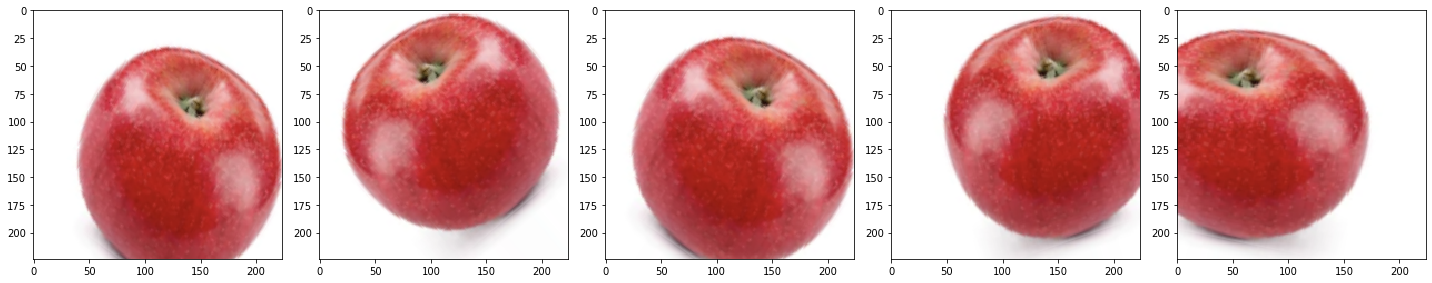

In [7]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [24]:
BATCH_SIZE = 6
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [25]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [26]:
mobile_net.trainable = False

In [27]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(6, activation='softmax') #[0, 1] or [1, 0]
    ])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit_generator(
    training_set,
    epochs=5,
    validation_data=test_set
    )

Epoch 1/5
38/38 [==============================] - 100s 2s/step - loss: 1.1497 - accuracy: 0.6001 - val_loss: 0.2876 - val_accuracy: 0.9400
Epoch 2/5
38/38 [==============================] - 85s 2s/step - loss: 0.2364 - accuracy: 0.9542 - val_loss: 0.1895 - val_accuracy: 0.9400
Epoch 3/5
38/38 [==============================] - 85s 2s/step - loss: 0.1669 - accuracy: 0.9642 - val_loss: 0.1419 - val_accuracy: 0.9633
Epoch 4/5
38/38 [==============================] - 86s 2s/step - loss: 0.1092 - accuracy: 0.9835 - val_loss: 0.1297 - val_accuracy: 0.9633
Epoch 5/5
38/38 [==============================] - 86s 2s/step - loss: 0.1097 - accuracy: 0.9706 - val_loss: 0.1122 - val_accuracy: 0.9633


In [30]:
#save model
from tensorflow.keras.models import load_model
model.save('fruitclass.h5')

In [2]:
from tensorflow.keras.models import load_model

In [4]:
#load model
model = load_model(('fruitclass.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def model_predict(image_path,model):
    print("Predicted")
    image = load_img(image_path,target_size=(224,224))
    image = img_to_array(image)
    image = image/255
    image = np.expand_dims(image,axis=0)
    
    result = model.predict(image)
    result = np.argmax(result)
    print(result)
    
    if result==0:
        print("The image classified freshapples")
    elif result == 1:
        print('The image classified freshbanana')
    elif result == 2:
        print('The image classified freshOrange')
    elif result == 3:
         print('The image classified rottenapples')
    elif result == 4:
         print('The image classified rottenbanana')      
    else:
        print("The image classified is rottenorange")

In [8]:
path='5.jpg'
model_predict(path,model)

Predicted
4
The image classified rottenbanana
